## Exercise 1

Consider the following bivariate distribution:

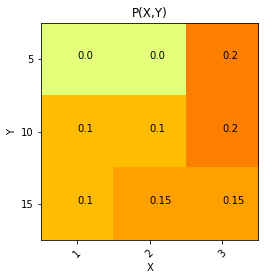

In [4]:
import matplotlib.pyplot as plt
import numpy as np

freq = [[0.,0.,0.2],[0.1,0.1,0.2],[0.1,0.15,0.15]]

plt.clf()
plt.imshow(freq, interpolation='nearest', cmap=plt.cm.Wistia)
X_values = ['1','2','3']
Y_values = ['5','10','15']
plt.ylabel('Y')
plt.xlabel('X') 
plt.title('P(X,Y)') 
plt.xticks(np.arange(len(X_values)), X_values, rotation=45)
plt.yticks(np.arange(len(Y_values)), Y_values)
for i in range(len(X_values)):
    for j in range(len(Y_values)):
        plt.text(j,i, str(freq[i][j]))
plt.show()

**1) Show that P(X) is a valid distribution function.**

**2) Show that X and Y are not independent.**

**3) Find the marginal distribution of X.**

**4) Find P(Y=10 | X < 2).**

## Exercise 2

Let's suppose the following joint probability distribution is known for a medicine:

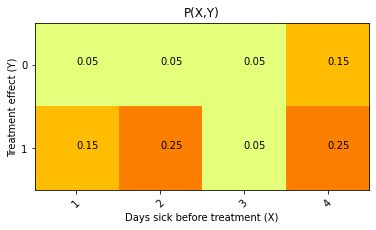

In [5]:
freq = [[0.05,0.05,0.05, 0.15],[0.15,0.25,0.05,0.25]]

plt.clf()
plt.imshow(freq, interpolation='nearest', cmap=plt.cm.Wistia)
X_values = ['1','2','3','4']
Y_values = ['0','1']
plt.ylabel('Treatment effect (Y)')
plt.xlabel('Days sick before treatment (X)') 
plt.title('P(X,Y)') 
plt.xticks(np.arange(len(X_values)), X_values, rotation=45)
plt.yticks(np.arange(len(Y_values)), Y_values)
for i in range(len(X_values)):
    for j in range(len(Y_values)):
        plt.text(i,j, str(freq[j][i]))
plt.show()

Let Y represent the treatment outcome (0 = not recovered, 1 = recovered) and X represent the number of days sick before treatment. Find:

**1) P(Y=1)**

**2) P(Y=1 | X=4)**

**3) P(Y=1 | X<=4)**

**4) P(X=4 | Y=1)**

**5) P(X<=4 | Y=0)**

## Exercise 3

A hospital has 5 ambulances, two of them have one bed inside while the rest have two beds inside. Let X = number of two beds ambulances used on any given day and Y = number of one bed ambulances used on any given day.

Suppose the joint probability of X and Y is as follows:

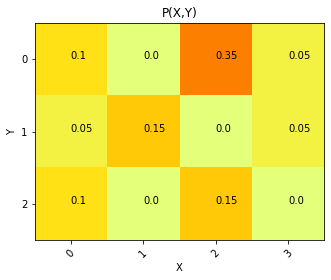

In [6]:
freq = [[0.1,0.0,0.35, 0.05],[0.05,0.15,0.,0.05],[0.10, 0.0, 0.15,0.0]]

plt.clf()
plt.imshow(freq, interpolation='nearest', cmap=plt.cm.Wistia)
X_values = ['0','1','2','3']
Y_values = ['0','1', '2']
plt.ylabel('Y')
plt.xlabel('X') 
plt.title('P(X,Y)') 
plt.xticks(np.arange(len(X_values)), X_values, rotation=45)
plt.yticks(np.arange(len(Y_values)), Y_values)
for i in range(len(X_values)):
    for j in range(len(Y_values)):
        plt.text(i,j, str(freq[j][i]))
plt.show()

Find the probability that, on any given day:

**1) None of the ambulances are hired.**

**2) All of the one bed ambulances are hired**

**3) At least 2 of the ambulances are hired.**

**4) All of the one bed ambulances are hired, if all the 2 beds ambulances have been hired.
Compare your answer to (2) and reason whether X and Y are independent.**

## Exercise 4

Let's consider the following data:

(2, 352)


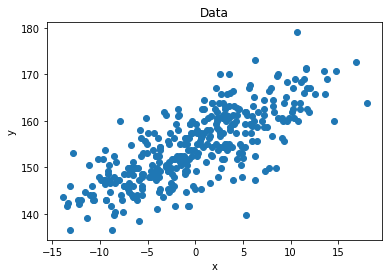

In [7]:
import pandas as pd
%run ./tools.py

data = np.load('./data_exercise4.npy')
print(data.shape)
x = data[0,:] - np.mean(data[0,:])
y = data[1,:]

plt.scatter(x,y)
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

df = pd.DataFrame({'x':x, 'y':y})

According to the plot above, a linear relationship seems to exist between x and y. Therefore, we model the data according to $y_i = \mathcal{N}(\mu_i, \sigma^{2})$ with $\mu_i = a + b*x_i$. We find a posterior distribution for the parameters a, b and $\sigma^{2}$ using a Laplace approximation.

In [8]:
expr = 'y ~ x'

# Initializing the likelihood
likelihood = 'gaussian'

# Defining the prior with hyperparameters 
prior_a_mean = 10
prior_a_sigma = 1
prior_a = ['gaussian', [prior_a_mean, prior_a_sigma]]

prior_b_mean = 0
prior_b_sigma = 1
prior_b = ['gaussian', [prior_b_mean, prior_b_sigma]]

sigma_inf = 20
sigma_sup = 50
prior_sigma_unif = [sigma_inf, sigma_sup]
prior_sigma = ['uniform', prior_sigma_unif]

priors = [prior_a, prior_b, prior_sigma]

solution_regression = laplace_solution_regression(expr, df, likelihood, priors)

/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/mlorenzi/miniconda3/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


      fun: 2553.9781184142303
 hess_inv: array([[ 0.78417032,  0.01180108, -0.2732403 ],
       [ 0.01180108,  0.03402224, -0.01498886],
       [-0.2732403 , -0.01498886,  1.17320308]])
      jac: array([ -5.31243896,  -2.84405518, -15.80325317])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 112
      nit: 11
     njev: 26
   status: 2
  success: False
        x: array([ 1.49934759e+01, -1.63769677e-02,  6.90520306e+01])


**1) Examine the posterior distribution for the regression parameters, and decide if the solution is correct or not.**

**2) In case there is any problem with the model, modify the code above in order to get a proper solution**

## Exercise 5

Consider the following function on the interval [0, 3]:

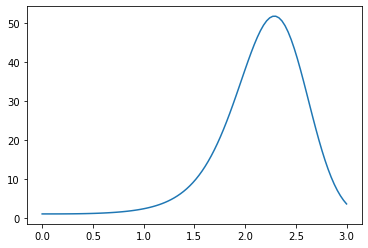

In [11]:
x = np.linspace(0., 3., 100)

# f = exp(x^2 sin(x))
f = np.exp(x**2*np.sin(x))

plt.plot(x, f)
plt.show()

**1) Approximate this function using the Laplace approximation.**

**2) Plot the original function and your approximation on the same graph.**

## Exercise 6

From the file grades.csv we are interested in predicting the final evaluation score from the midterm one. 

- (6.1) Find appropriate priors for a linear model. Sample from the priors to verify that the choice of all the priors parameters is compatible with the regression problem
- (6.2) Fit a regression model using these priors (you can use either your Laplace implementation or Stan)
- (6.3) Sample from the posterior and plot the related regression function. Is this simulation compatible with the observations?
- (6.4) Compute the standard deviation for the final score of a student with midterm score of 44.
- (6.5) Fit a quadratic model and compare it to the linear one for this regression problem. Which model would you prefer? Why?



# Exercise 7

Implement the Metropolis-Hastings algorithm to estimate the posterior distribution for the parameter of a Binomial model with prior *Beta(2,3)*. Assume 40 observations with 10 successes and 30 fails.